<ipython-input-21-770ac7817b83>:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(url,  delimiter = "  ")


41


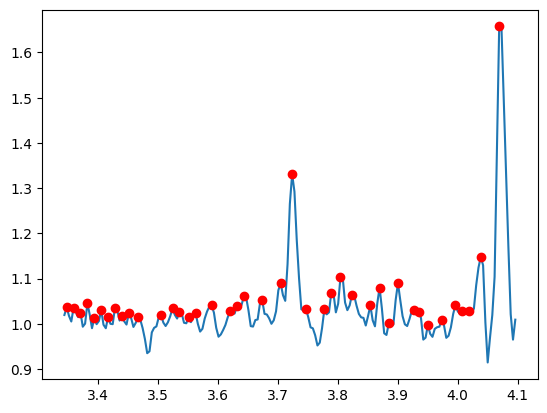

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#  Ejercicio 2.0.2 Maximos

url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EstrellaEspectro.txt'
data = pd.read_csv(url,  delimiter = "  ")

array = data.to_numpy().astype(float)
x = array[:, 0]
y = array[:, 1]
plt.plot(x, y)

local_maximums_y = []
for i in range(1, len(y)-1):
  if y[i] > y[i+1] and y[i] > y[i-1]:
    local_maximums_y.append(y[i])
print(len(local_maximums_y))

for i in range(len(y)):
  if y[i] in local_maximums_y:
    plt.plot(x[i], y[i], 'ro')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

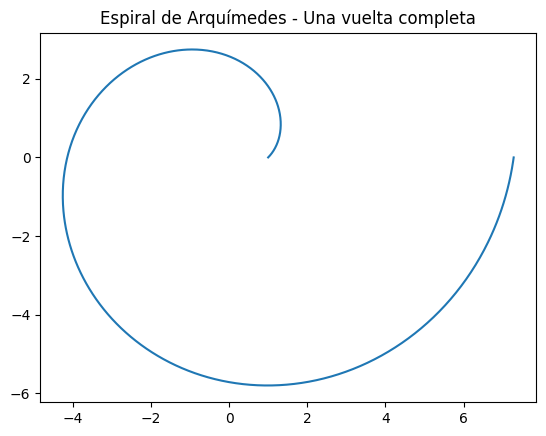

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ejercicio 2.0.5 Espiral de arquimedes

# Parámetros del espiral
a=1
b=1

# Generamos los valores de theta que serán utilizados
angulo=np.linspace(0, 2 * np.pi, 1000)

# Generamos el radio de cada valor del ángulo
r =a+b*angulo

# Convertimos las coordenadas polares (r, angulo) a cartesianas (x, y)
x=r*np.cos(angulo)
y=r*np.sin(angulo)

# Graficamos la espiral
plt.plot(x, y)
plt.title('Espiral de Arquímedes - Una vuelta completa')
plt.show()

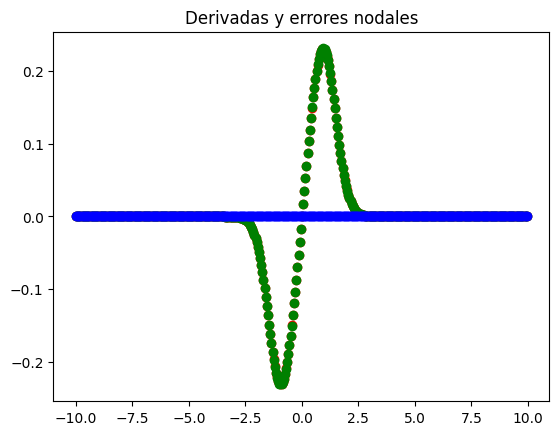

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#  Ejercicio Derivacion 2

def f(x):
    return 1/np.sqrt(1+np.exp(-x**2))

def central_derivate(f, x, h):
    return (f(x+h)-f(x-h))/(2*h)
def exact_derivate(x):
    exp = np.exp(-x**2)
    return (exp * x) / (1 + exp)**(3/2)

h = 0.05
x_values = np.arange(-10, 10, h) #Numeros nodales

d = []
e = []
error = []

for x in x_values:
  derivates = central_derivate(f, x, h) #Derivada numerica
  exact = exact_derivate(x) #Derivada exacta
  d.append(derivates)
  e.append(exact)
  error.append(np.abs((derivates) - (exact)))

plt.scatter(x_values, d, color="red")
plt.scatter(x_values, e, color="green")
plt.scatter(x_values, error, color="blue")
plt.title('Derivadas y errores nodales')

plt.show()


<ipython-input-37-d7f2d9a8815a>:21: RuntimeWarning: divide by zero encountered in divide
  return V*x*(1-((R**2)/(x**2+y**2)))
<ipython-input-37-d7f2d9a8815a>:21: RuntimeWarning: invalid value encountered in multiply
  return V*x*(1-((R**2)/(x**2+y**2)))


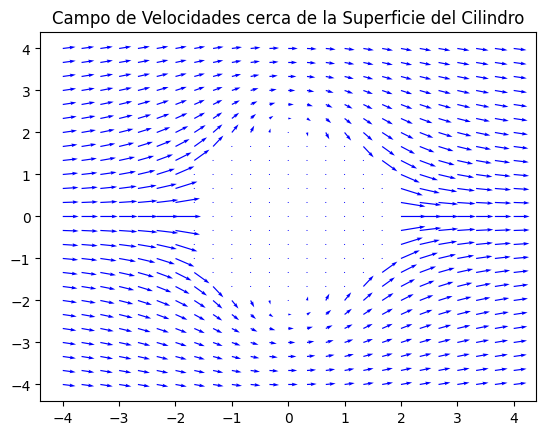

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ejercicio Derivacion 6


#Variables con los rangos para cada eje
x_mayor=4
x_menor=-4
y_mayor=4
y_menor=-4


# Discretización de los ejes
x=np.linspace(x_menor,x_mayor,25)
y=np.linspace(y_menor,y_mayor,25)
X, Y = np.meshgrid(x, y)


def potencial_flujo(x,y,R,V):
  return V*x*(1-((R**2)/(x**2+y**2)))

phi= potencial_flujo(X,Y,R,V)

def derivada_phi_respecto_x(f, x, y):
  h=0.001
  V=2
  R=2
  return (f(x + h, y, V, R) - f(x - h, y, V, R)) / (2 * h)

def derivada_phi_respecto_y(f, x, y):
  h=0.001
  V=2
  R=2
  return (f(x, y + h, V, R) - f(x, y - h, V, R)) / (2 * h)


vx = np.zeros_like(phi)
vy = np.zeros_like(phi)

for i in range(phi.shape[0]):
    for j in range(phi.shape[1]):
      if X[i, j]**2 + Y[i, j]**2 >= R**2:
        vx[i, j] = derivada_phi_respecto_x(potencial_flujo,X[i, j], Y[i, j])
        vy[i, j] = -derivada_phi_respecto_y(potencial_flujo,X[i, j], Y[i, j])
      else:
        vx[i, j] = 0
        vy[i, j] = 0


dx=vx
dy=vy


plt.quiver(x, y, dx, dy,color='blue')
plt.title('Campo de Velocidades cerca de la Superficie del Cilindro')
plt.show()